In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
df.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


There are no missing values in each columns except "FavoriteCount".  
A missing values in this column may means the question is not in any favorite list then we can replace them with zero

Types of each column seem to be ok.

Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.

In [116]:
df["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

## Cleaning Data

In [117]:
df["FavoriteCount"].fillna(0, inplace=True)
df["FavoriteCount"] = df["FavoriteCount"].astype(int)

In [118]:
df.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0


In [119]:
df["Tags"] = df["Tags"].str.replace("^<|>$", "").str.split("><")

In [120]:
df

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0
5,44430,2019-01-23 11:13:32,0,283,[fuzzy-logic],1,0
6,44432,2019-01-23 11:17:46,1,214,"[time-series, anomaly-detection, online-learning]",0,1
7,44436,2019-01-23 12:49:39,0,9,[matrix-factorisation],0,0
8,44437,2019-01-23 13:04:11,0,7,"[correlation, naive-bayes-classifier]",0,0
9,44438,2019-01-23 13:16:29,0,584,"[machine-learning, python, deep-learning, kera...",1,0


In [121]:
tag_count = {}

for tags in df["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [122]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
learning,10
lasso,8
project-planning,6
bayes-error,1
game,7
sequence,25
gradient-descent,98
accuracy,89
manhattan,3
discounted-reward,5


In [145]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


In [155]:
view_count = {}

for idx,tags in enumerate(df["Tags"]):
    for tag in tags:
        if tag in view_count:
            view_count[tag] += df["ViewCount"].iloc[idx]
        else:
            view_count[tag] = df["ViewCount"].iloc[idx]

In [156]:
view_count = pd.DataFrame.from_dict(view_count, orient="index")
view_count.rename(columns={0: "ViewCount"},inplace=True)
view_count

,ViewCount
learning,893
lasso,347
project-planning,249
bayes-error,128
game,480
sequence,3393
gradient-descent,14837
accuracy,15233
manhattan,152
discounted-reward,368


In [157]:
most_viewed = view_count.sort_values(by="ViewCount").tail(20)
most_viewed

,ViewCount
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91a0374f60>],
      dtype=object)

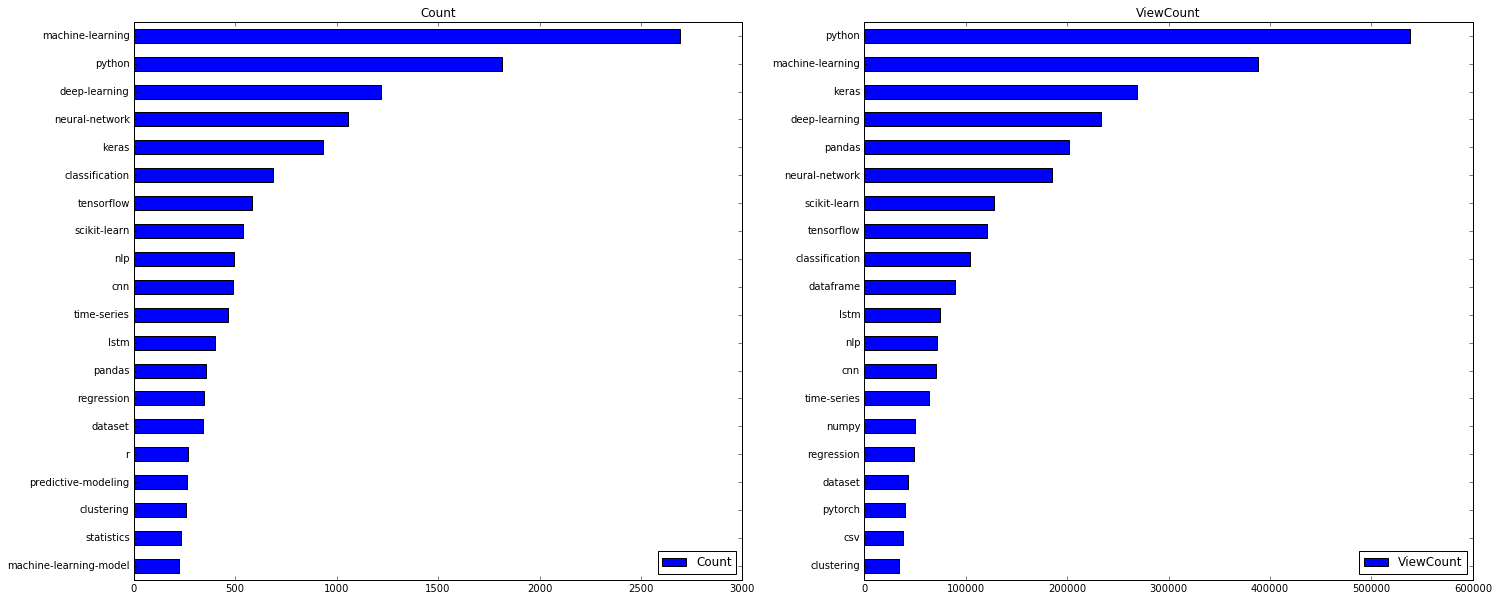

In [169]:
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)


In [161]:
in_used_m = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used_v = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

In [162]:
in_used_m

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [163]:
in_used_v

,Count,ViewCount
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


## Relation Between Tags

In [177]:
all_tags = list(tag_count.index)

In [173]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations

,learning,lasso,project-planning,bayes-error,game,sequence,gradient-descent,accuracy,manhattan,discounted-reward,...,automl,data-cleaning,machine-learning,market-basket-analysis,data-product,data,summarunner-architecture,neural,inception,activity-recognition
learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lasso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
project-planning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bayes-error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sequence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gradient-descent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discounted-reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
associations.fillna(0, inplace=True)

for tags in df["Tags"]:
    associations.loc[tags, tags] += 1

In [184]:
relations_most_used = associations.loc[most_used.index, most_used.index]


In [187]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

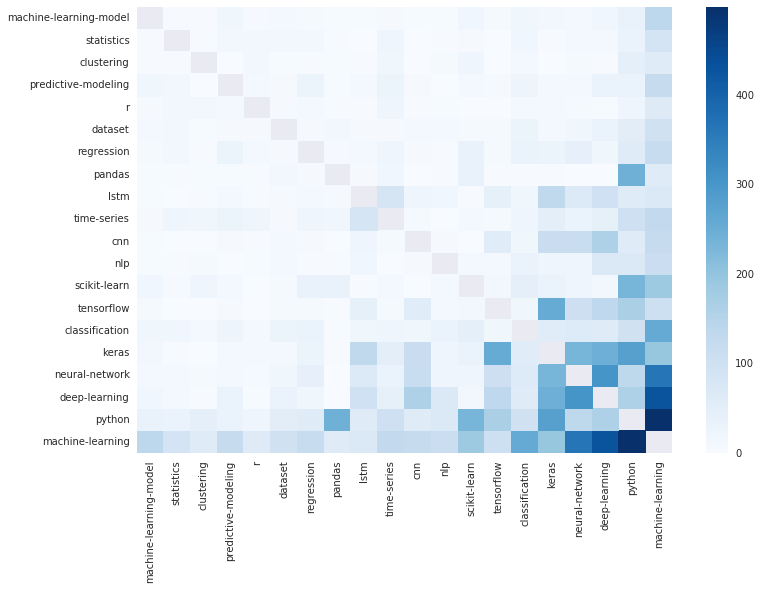

In [191]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Blues", annot=False)

In [227]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [228]:
all_q["Tags"] = all_q["Tags"].str.strip("<>").str.split("><")
all_q

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
5,45428,2019-02-12 05:43:18,[cnn]
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]"
7,45431,2019-02-12 07:26:56,[machine-learning]
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]"
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]"


We see the relationship about tags that related to deep-learning tag and found those tags ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

In [229]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [230]:
all_q["Deep-learning"] = all_q["Tags"].apply(class_deep_learning)

In [231]:
all_q.sample(5)

,Id,CreationDate,Tags,Deep-learning
18181,54369,2019-06-24 08:31:54,"[machine-learning, deep-learning, supervised-l...",1
11108,42581,2018-12-14 02:11:54,"[classification, supervised-learning]",0
14757,31206,2018-05-04 09:31:25,"[rnn, pca, aws]",0
10007,49809,2019-04-23 23:44:44,"[optimization, matlab, genetic-algorithms]",0
12184,43119,2018-12-25 07:39:02,"[machine-learning, neural-network, deep-learni...",1


In [232]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [233]:
all_q

,Id,CreationDate,Tags,Deep-learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


In [234]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

In [235]:
all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [237]:
all_q.head()

,Id,CreationDate,Tags,Deep-learning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


In [246]:
quarterly = all_q.groupby("Quarter").agg({"Deep-learning":["sum", 'size']})
quarterly.columns = ["DeepLearningQ", "TotalQ"]
quarterly["DeepLearningRate"] = quarterly["DeepLearningQ"] / quarterly["TotalQ"]
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQ,TotalQ,DeepLearningRate
13,17Q3,247,714,0.345938
10,16Q4,177,527,0.335863
12,17Q2,226,647,0.349304
8,16Q2,109,518,0.210425
2,14Q4,21,216,0.097222


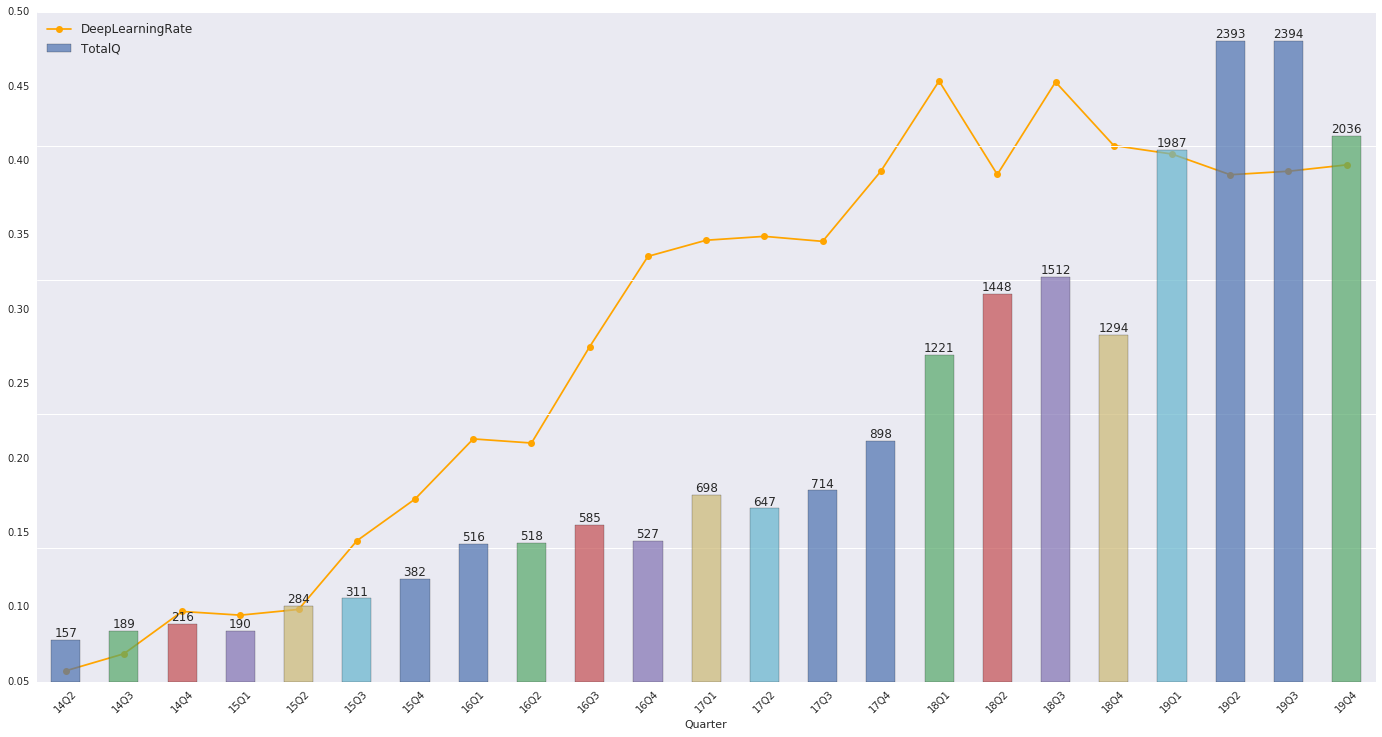

In [247]:
# Create line graph Quarter vs. DeepLearningRate
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )
# Create bar graph Quarter vs. TotalQ // ax=ax1 make second graph overlay with
# fisrt graph // secondary_y make x be at right side
ax2 = quarterly.plot(x="Quarter", y="TotalQ",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

# Create values of totalQ on the top of the bar
for idx, t in enumerate(quarterly["TotalQ"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

# Create legend on top left 
ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

# imporving plot aesthetics by removing splines and totalQ values at right side of the graph
for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.